In [184]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

from sklearn.model_selection import train_test_split, learning_curve, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/CSE_student_performances.csv
/content/CSE_student_performances_cleaned.csv
/content/.config/gce
/content/.config/active_config
/content/.config/.last_survey_prompt.yaml
/content/.config/default_configs.db
/content/.config/.last_opt_in_prompt.yaml
/content/.config/config_sentinel
/content/.config/.last_update_check.json
/content/.config/logs/2024.02.28/14.26.40.982380.log
/content/.config/logs/2024.02.28/14.26.32.892350.log
/content/.config/logs/2024.02.28/14.26.23.707193.log
/content/.config/logs/2024.02.28/14.26.50.663871.log
/content/.config/logs/2024.02.28/14.25.58.242786.log
/content/.config/logs/2024.02.28/14.26.51.573026.log
/content/.config/configurations/config_default
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv


In [185]:
df = pd.read_csv('/content/CSE_student_performances.csv')

In [186]:
df.head()

,Age,Gender,AcademicPerformance,TakingNoteInClass,DepressionStatus,FaceChallangesToCompleteAcademicTask,LikePresentation,SleepPerDayHours,NumberOfFriend,LikeNewThings
0,23,male,Average,No,Sometimes,Yes,Yes,12,NaN,Yes
1,23,male,Excellent,Sometimes,Yes,No,Yes,8,80.0,Yes
2,24,Male,Average,No,Sometimes,Sometimes,No,8,10.0,Yes
3,20,Female,Good,Yes,Sometimes,Yes,No,5,15.0,Yes
4,24,Female,Average,Yes,Yes,Yes,Yes,5,2.0,Yes


In [187]:
df.isnull().sum()

Age                                     0
Gender                                  0
AcademicPerformance                     0
TakingNoteInClass                       0
DepressionStatus                        0
FaceChallangesToCompleteAcademicTask    0
LikePresentation                        0
SleepPerDayHours                        0
NumberOfFriend                          4
LikeNewThings                           0
dtype: int64

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age                                   99 non-null     int64  
 1   Gender                                99 non-null     object 
 2   AcademicPerformance                   99 non-null     object 
 3   TakingNoteInClass                     99 non-null     object 
 4   DepressionStatus                      99 non-null     object 
 5   FaceChallangesToCompleteAcademicTask  99 non-null     object 
 6   LikePresentation                      99 non-null     object 
 7   SleepPerDayHours                      99 non-null     int64  
 8   NumberOfFriend                        95 non-null     float64
 9   LikeNewThings                         99 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.9+ KB


In [189]:
df.dtypes

Age                                       int64
Gender                                   object
AcademicPerformance                      object
TakingNoteInClass                        object
DepressionStatus                         object
FaceChallangesToCompleteAcademicTask     object
LikePresentation                         object
SleepPerDayHours                          int64
NumberOfFriend                          float64
LikeNewThings                            object
dtype: object

In [190]:
df['NumberOfFriend'].value_counts()

3.0      18
2.0       9
7.0       9
4.0       7
6.0       7
15.0      5
12.0      5
1.0       4
23.0      4
9.0       4
100.0     4
0.0       4
17.0      3
55.0      3
60.0      3
10.0      3
80.0      3
Name: NumberOfFriend, dtype: int64

In [191]:
df.rename(columns={"Age ": "Age"}, inplace=True)

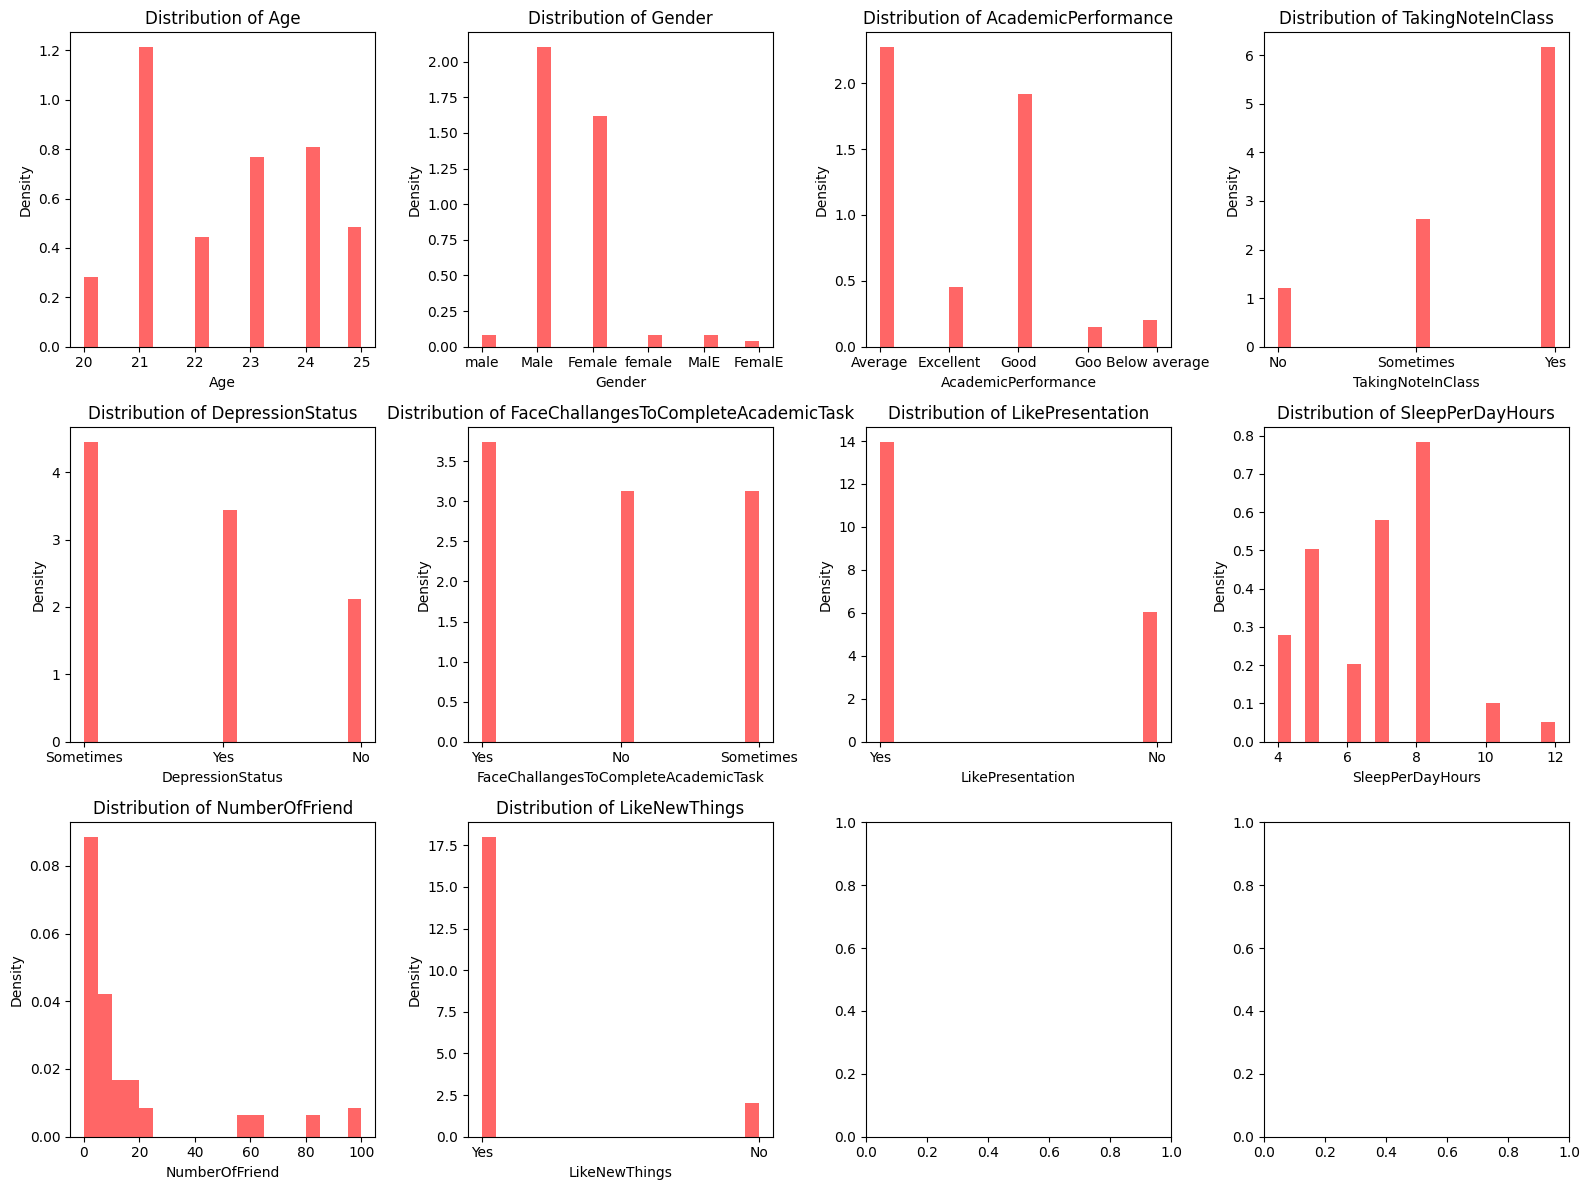

In [192]:
# Calculate the number of rows needed to display the subplots
num_cols = 4
num_rows = (len(df.columns) - 1) // num_cols + 1

# Create a figure and subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4*num_rows))

# Plot the distribution graphs for each column
for i, column in enumerate(df.columns):
    row_idx = i // 4
    col_idx = i % 4
    axes[row_idx, col_idx].hist(df[column], bins=20, density=True, alpha=0.6, color='red')
    axes[row_idx, col_idx].set_title(f'Distribution of {column}')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel('Density')

# Adjust the spacing between subplots for better presentation
plt.tight_layout()

plt.show()

In [193]:
def plot_distribution(column):
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, density=False, alpha=0.6, color='orange')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Create a selection widget to choose the column
column_selector = widgets.Dropdown(
    options=df.columns,
    description='Choose a column:',
    disabled=False,
)

# Apply the plotting function when the widget value changes
widgets.interactive(plot_distribution, column=column_selector)

interactive(children=(Dropdown(description='Choose a column:', options=('Age', 'Gender', 'AcademicPerformance'…

In [194]:
df['AcademicPerformance'] = df['AcademicPerformance'].apply(lambda x: 'Good' if x == 'Goo' else x)

In [195]:
df['AcademicPerformance'] = pd.Categorical(df['AcademicPerformance'], categories=['Below average', 'Average', 'Good', 'Excellent'])
df['AcademicPerformance'] = df['AcademicPerformance'].astype('category').cat.codes

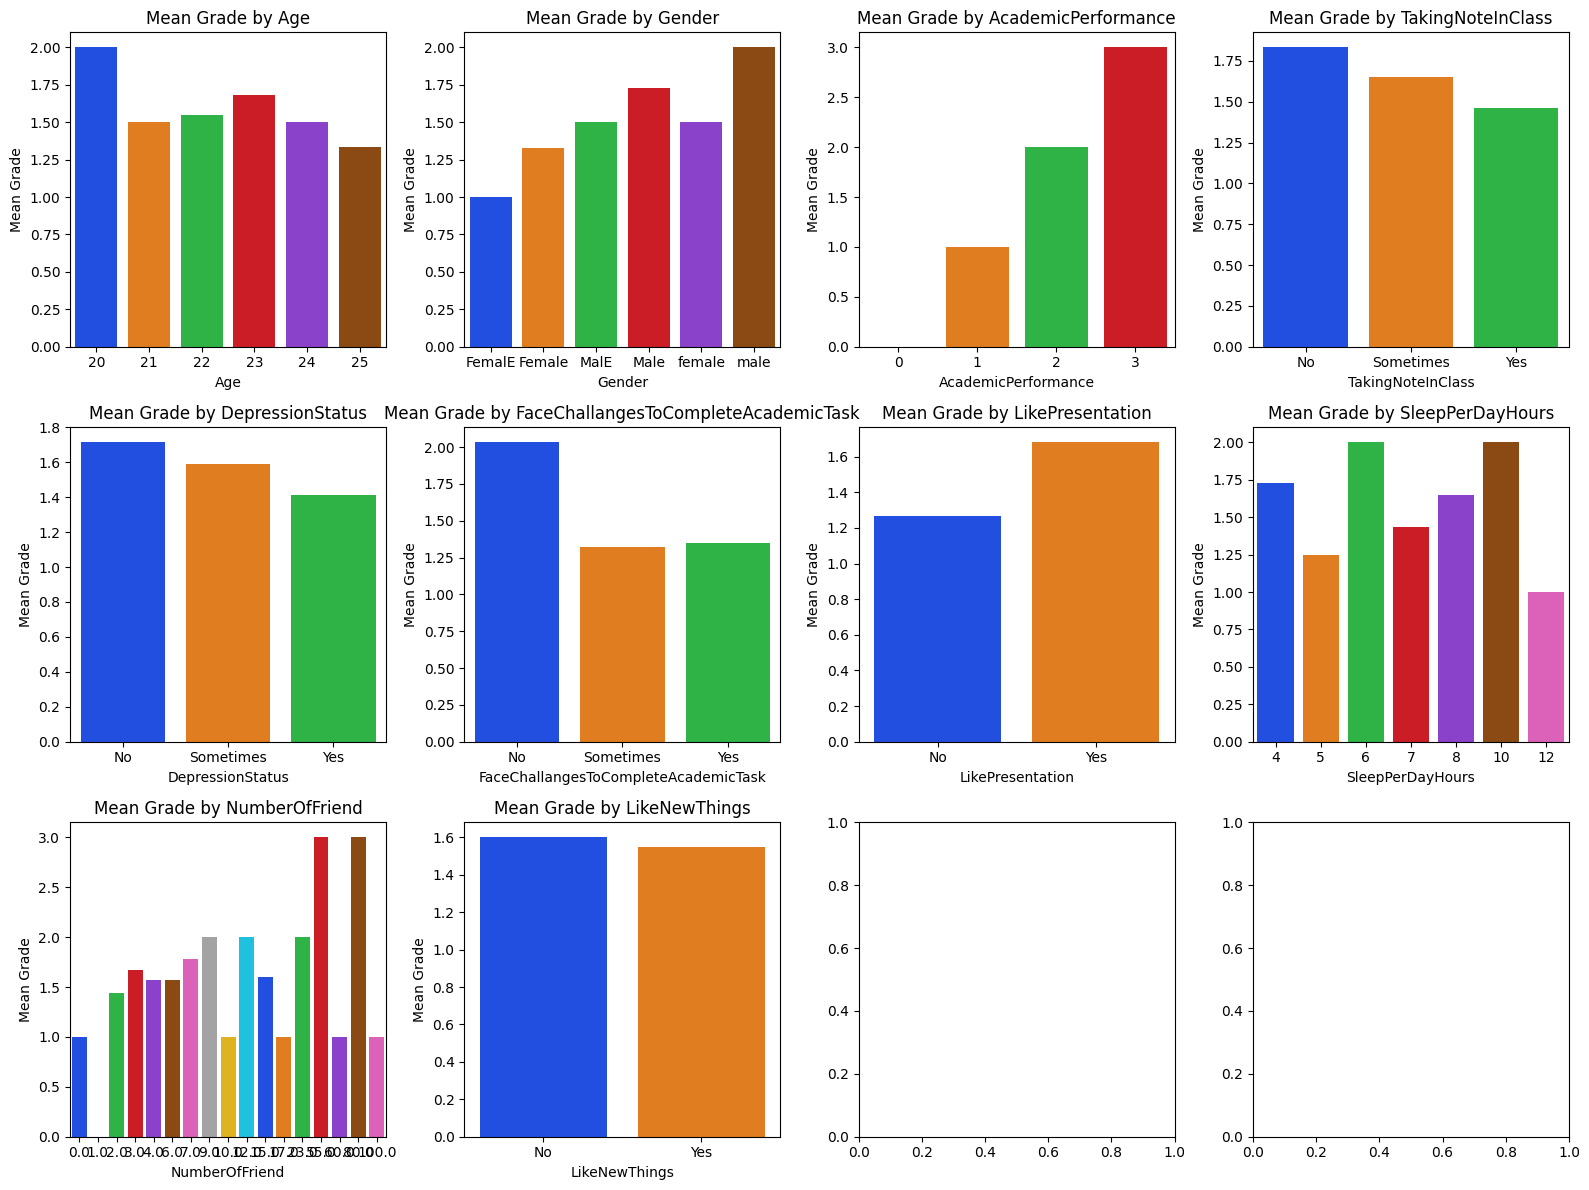

In [196]:
# Calculate the number of rows and columns needed for the subplots
num_cols = 4
num_rows = (len(df.columns) - 1) // num_cols + 1

# Create a figure and subplots for each column
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4*num_rows))

# Iterate through each column and create subplots
for i, column in enumerate(df.columns):
    row_idx = i // 4
    col_idx = i % 4

    # Calculate the mean of G3_mat for each category in the current column
    mean_grades_by_column = df.groupby(column)['AcademicPerformance'].mean()

    # Plot the bar plot for G3_mat mean by category in the current column
    sns.barplot(x=mean_grades_by_column.index, y=mean_grades_by_column.values, ax=axes[row_idx, col_idx], palette='bright')
    axes[row_idx, col_idx].set_title(f'Mean Grade by {column}')
    axes[row_idx, col_idx].set_xlabel(column)
    axes[row_idx, col_idx].set_ylabel('Mean Grade')

# Adjust spacing between subplots for better presentation
plt.tight_layout()

plt.show()

In [197]:
def plot_mean(column):
    plt.figure(figsize=(8, 6))
    # Calculate the mean of G3_mat for each category in the current column
    mean_grades_by_column = df.groupby(column)['AcademicPerformance'].mean()
    sns.barplot(x=mean_grades_by_column.index, y=mean_grades_by_column.values, palette='bright')
    plt.title(f'Mean Grade by {column}')
    plt.xlabel(column)
    plt.ylabel('Mean Grade')
    plt.show()

# Create a selection widget to choose the column
column_selector = widgets.Dropdown(
    options=df.columns,
    description='Choose a column:',
    disabled=False,
)

# Apply the plotting function when the widget value changes
widgets.interactive(plot_mean, column=column_selector)

interactive(children=(Dropdown(description='Choose a column:', options=('Age', 'Gender', 'AcademicPerformance'…

In [198]:
for col in df.columns:
  print(col, '\n', df[col].unique())

Age 
 [23 24 20 21 22 25]
Gender 
 ['male' 'Male' 'Female' 'female' 'MalE' 'FemalE']
AcademicPerformance 
 [1 3 2 0]
TakingNoteInClass 
 ['No' 'Sometimes' 'Yes']
DepressionStatus 
 ['Sometimes' 'Yes' 'No']
FaceChallangesToCompleteAcademicTask 
 ['Yes' 'No' 'Sometimes']
LikePresentation 
 ['Yes' 'No']
SleepPerDayHours 
 [12  8  5  4  7  6 10]
NumberOfFriend 
 [ nan  80.  10.  15.   2.  12.   7.   6.   3.   4.  60.  55.  17.   1.
 100.   9.  23.   0.]
LikeNewThings 
 ['Yes' 'No']


In [199]:
df['Gender'] = df['Gender'].str.lower()
df = pd.get_dummies(df, columns=['Gender', 'LikePresentation', 'LikeNewThings'], drop_first=True)

new_column_names = {col: col.rsplit('_', 1)[0] for col in df.columns if '_' in col}
df = df.rename(columns=new_column_names)

In [200]:
for col in list(df.columns[df.dtypes == 'object']):
  df[col] = pd.Categorical(df[col], categories=['No', 'Sometimes', 'Yes'])
  df[col] = df[col].astype('category').cat.codes

In [201]:
df_copy = df.copy()
test_df = df_copy[df_copy['NumberOfFriend'].isnull() == True]
train_df = df_copy[df_copy['NumberOfFriend'].isnull() == False]
y = train_df['NumberOfFriend']

train_df.drop(['NumberOfFriend'], axis=1, inplace=True)
test_df.drop(['NumberOfFriend'], axis=1, inplace=True)

In [202]:
lr = LinearRegression()

lr.fit(train_df, y)

pred = lr.predict(test_df)

In [203]:
indices = test_df.index.to_numpy()

df.loc[indices, 'NumberOfFriend'] = pred

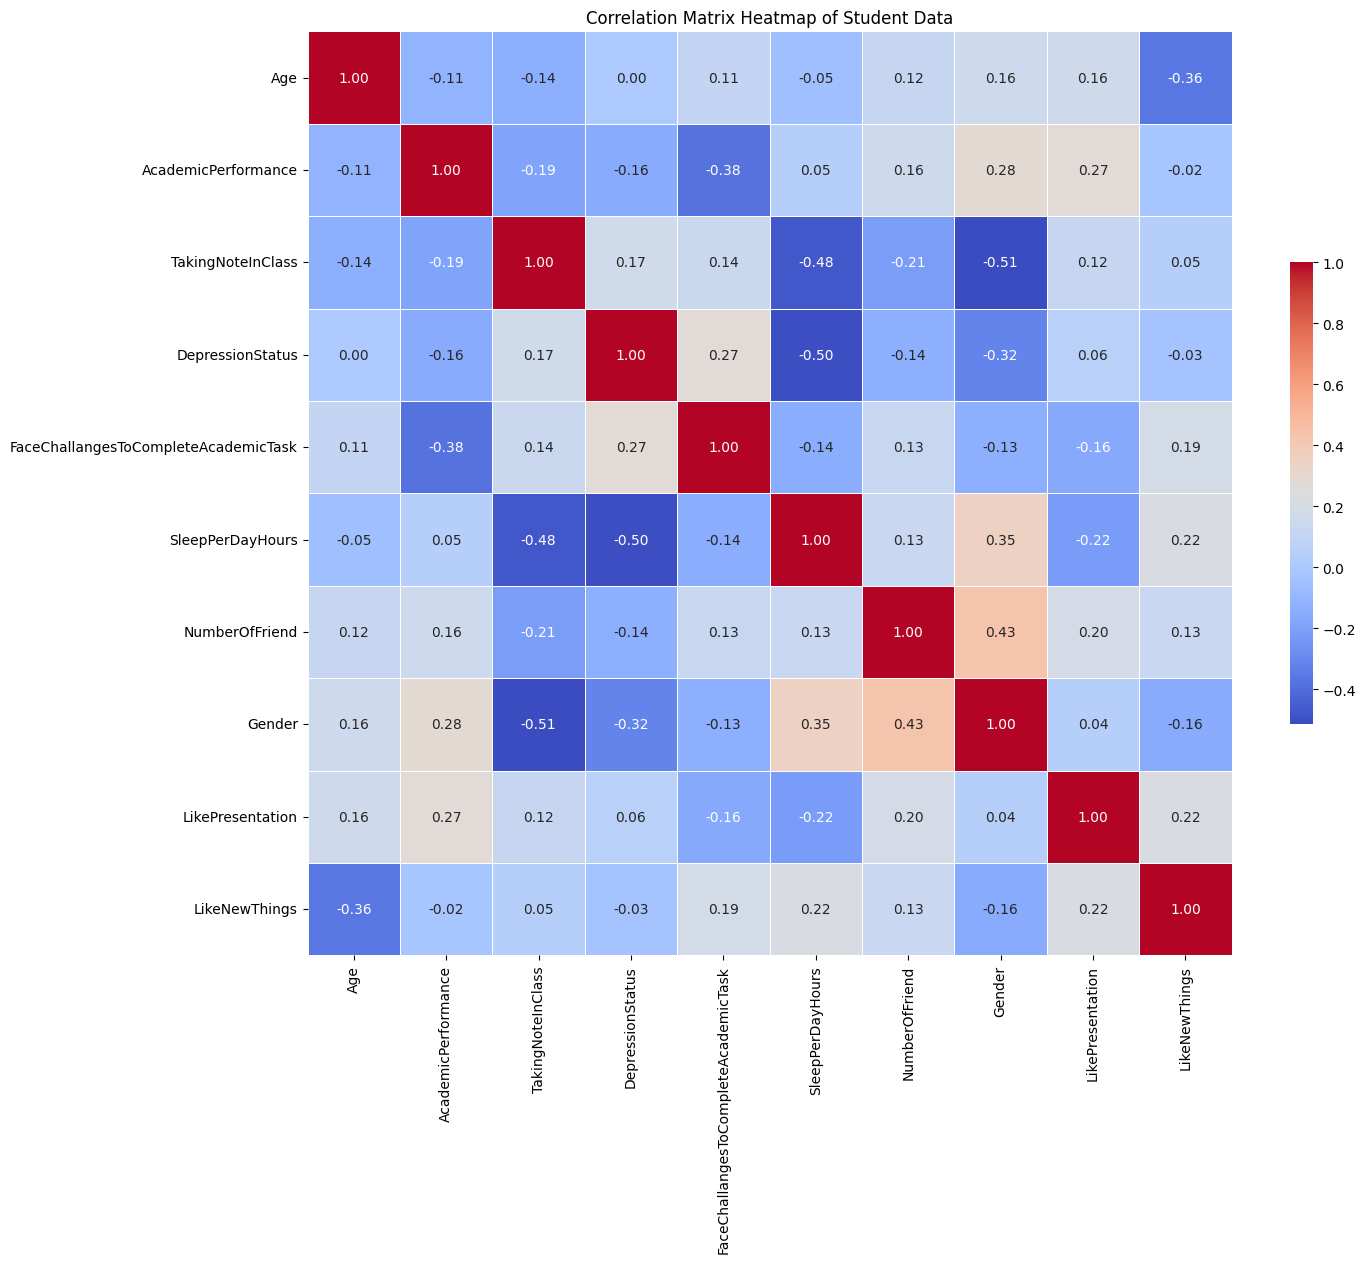

In [205]:
# Compute the correlation matrix for numeric columns only
correlation_matrix = df.corr()

plt.figure(figsize=(15, 12))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix Heatmap of Student Data')

plt.show()

In [207]:
df.to_csv('/content/CSE_student_performances_cleaned.csv')

In [208]:
X = df.drop(columns='AcademicPerformance')
y = df['AcademicPerformance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [209]:
models = {
    'LinearRegression': LinearRegression(),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor(random_state=42)
}

In [210]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    results[name] = {
        'RMSE_train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE_test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'MAE_train': mean_absolute_error(y_train, y_pred_train),
        'MAE_test': mean_absolute_error(y_test, y_pred_test),
        'R2_train': r2_score(y_train, y_pred_train),
        'R2_test': r2_score(y_test, y_pred_test)
    }

In [211]:
results_df = pd.DataFrame(results).T
results_df

,RMSE_train,RMSE_test,MAE_train,MAE_test,R2_train,R2_test
LinearRegression,0.585412,0.764790,0.463438,0.577224,0.329763,-0.202517
GradientBoostingRegressor,0.045215,0.741819,0.032844,0.296704,0.996002,-0.131363
RandomForestRegressor,0.077686,0.631028,0.051622,0.300400,0.988197,0.181340


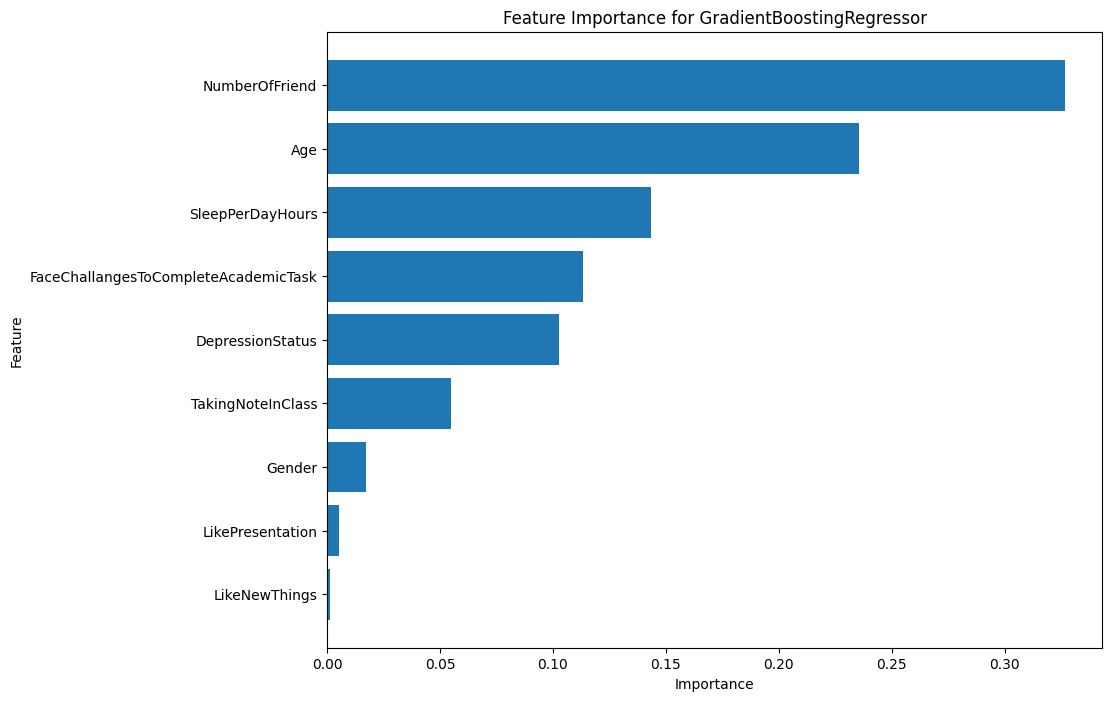

In [212]:
# Получаем значимость признаков для модели случайного леса
feature_importances = models['GradientBoostingRegressor'].feature_importances_

# Создаем DataFrame для значимости признаков
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Сортируем по значимости
features_df = features_df.sort_values(by='Importance', ascending=True)

# Строим столбчатый график
plt.figure(figsize=(10, 8))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for GradientBoostingRegressor')
plt.show()

In [213]:
# Параметры для GradientBoostingRegressor
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2]
}

# Создаем объект GridSearchCV для GradientBoostingRegressor
grid_search_gb = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid_gb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Выполняем подбор параметров
grid_search_gb.fit(X_train, y_train)

# Лучшие параметры и лучший результат
best_params_gb = grid_search_gb.best_params_
best_score_gb = np.sqrt(-grid_search_gb.best_score_)

best_params_gb, best_score_gb

({'learning_rate': 0.2,
  'max_depth': 3,
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 300},
 0.24304082423885576)

In [214]:
# Оцениваем качество работы моделей на основе кросс-валидации
cv_results = {}
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_results[name] = np.sqrt(-scores)

# Подготовим результаты в формате DataFrame для удобства восприятия
cv_results_df = pd.DataFrame(cv_results)
cv_results_df

,LinearRegression,GradientBoostingRegressor,RandomForestRegressor
0,0.696937,0.088165,0.147445
1,0.532567,0.098474,0.137423
2,0.660116,0.067831,0.133772
3,0.691072,0.112268,0.130671
4,0.658186,0.095377,0.105681


In [215]:
# Определяем кривые обучения для случайного леса
train_sizes, train_scores, test_scores = learning_curve(RandomForestRegressor(random_state=42), X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

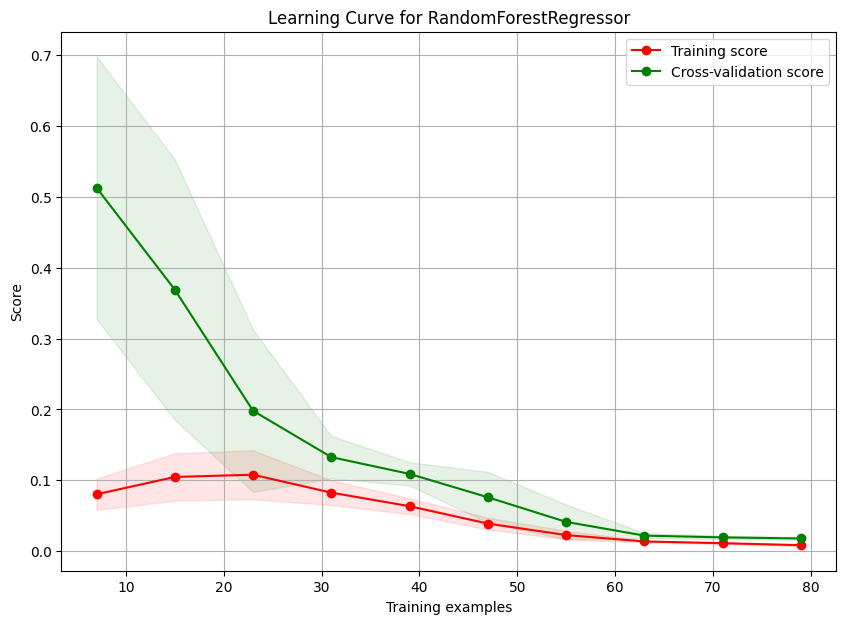

In [216]:
# Вычисляем среднее и стандартное отклонение для обучающего и тестового наборов
train_scores_mean = np.mean(-train_scores, axis=1)
train_scores_std = np.std(-train_scores, axis=1)
test_scores_mean = np.mean(-test_scores, axis=1)
test_scores_std = np.std(-test_scores, axis=1)

# Строим графики
plt.figure(figsize=(10, 7))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve for RandomForestRegressor")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [217]:
X = df.drop(columns='Gender')
y = df['Gender']

In [218]:
# Разделяем данные на новые обучающий и тестовый наборы
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y, test_size=0.25, random_state=42)

# Инициализируем модели классификации
class_models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForestClassifier': RandomForestClassifier(random_state=42)
}

In [219]:
# Обучаем модели и собираем метрики
class_results = {}
for name, model in class_models.items():
    model.fit(X_train, y_train_bin)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    class_results[name] = {
        'Accuracy_train': accuracy_score(y_train_bin, y_pred_train),
        'Accuracy_test': accuracy_score(y_test_bin, y_pred_test),
        'F1_train': f1_score(y_train_bin, y_pred_train),
        'F1_test': f1_score(y_test_bin, y_pred_test)
    }

In [220]:
# Подготовим результаты в формате DataFrame
class_results_df = pd.DataFrame(class_results).T
class_results_df

,Accuracy_train,Accuracy_test,F1_train,F1_test
LogisticRegression,0.918919,0.88,0.923077,0.896552
RandomForestClassifier,1.000000,0.88,1.000000,0.888889


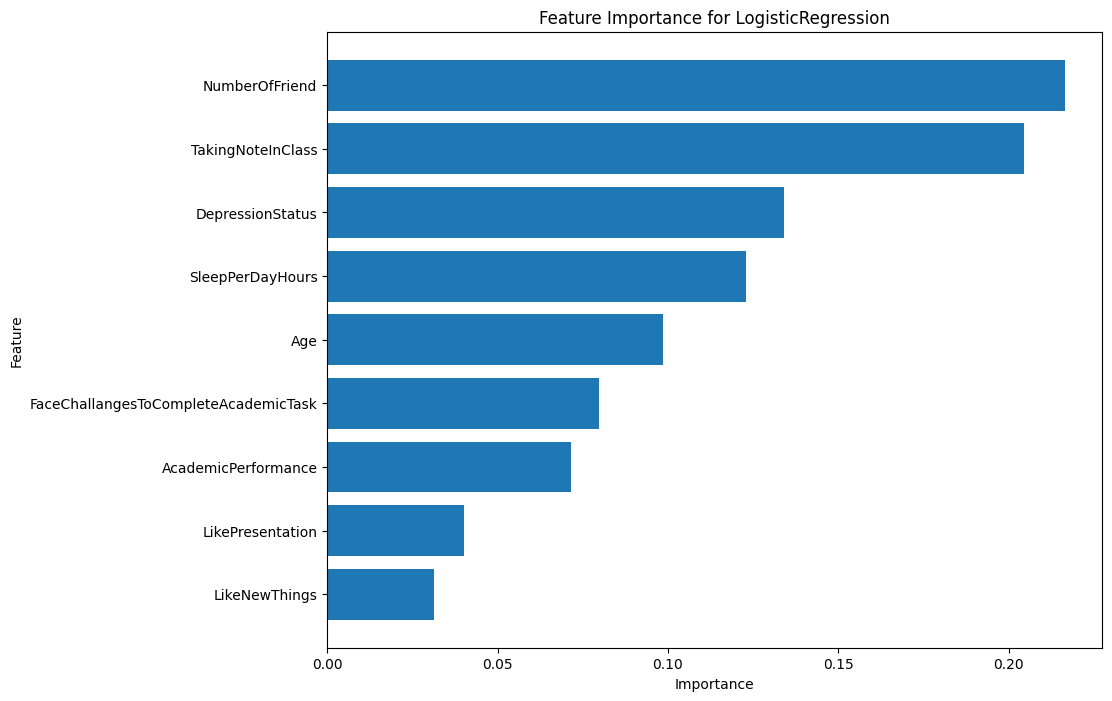

In [221]:
# Получаем значимость признаков для модели случайного леса
feature_importances = class_models['RandomForestClassifier'].feature_importances_

# Создаем DataFrame для значимости признаков
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Сортируем по значимости
features_df = features_df.sort_values(by='Importance', ascending=True)

# Строим столбчатый график
plt.figure(figsize=(10, 8))
plt.barh(features_df['Feature'], features_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for LogisticRegression')
plt.show()

In [222]:
# Параметры для RandomForestClassifier
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4]
}

# Создаем объект GridSearchCV для RandomForestClassifier
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Выполняем подбор параметров
grid_search_rf.fit(X_train, y_train_bin)

# Лучшие параметры и лучший результат
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

best_params_rf, best_score_rf

({'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 50},
 0.9333333333333333)

In [223]:
# Оцениваем качество работы моделей на основе кросс-валидации
cv_results = {}
for name, model in class_models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_results[name] = np.sqrt(-scores)

# Подготовим результаты в формате DataFrame для удобства восприятия
cv_results_df = pd.DataFrame(cv_results)
cv_results_df

,LogisticRegression,RandomForestClassifier
0,0.387298,0.0
1,0.316228,0.0
2,0.387298,0.0
3,0.387298,0.0
4,0.324443,0.0


In [224]:
# Определяем кривые обучения для RandomForestClassifier
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(RandomForestClassifier(random_state=42, n_estimators=6, max_depth=5, min_samples_split=2, min_samples_leaf=1), X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

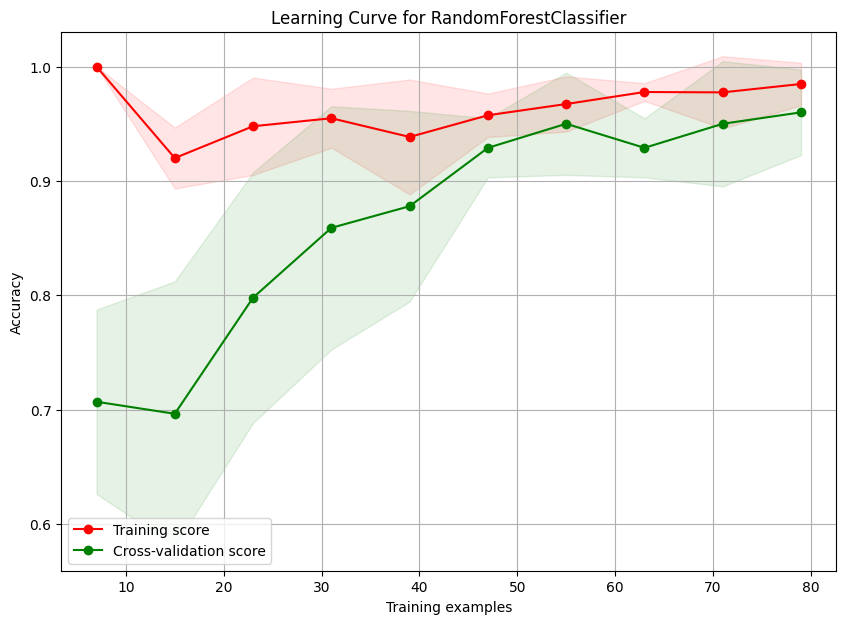

In [225]:
# Вычисляем среднее и стандартное отклонение для обучающего и тестового наборов
train_scores_mean_rf = np.mean(train_scores_rf, axis=1)
train_scores_std_rf = np.std(train_scores_rf, axis=1)
test_scores_mean_rf = np.mean(test_scores_rf, axis=1)
test_scores_std_rf = np.std(test_scores_rf, axis=1)

# Строим графики
plt.figure(figsize=(10, 7))
plt.fill_between(train_sizes_rf, train_scores_mean_rf - train_scores_std_rf, train_scores_mean_rf + train_scores_std_rf, alpha=0.1, color="r")
plt.fill_between(train_sizes_rf, test_scores_mean_rf - test_scores_std_rf, test_scores_mean_rf + test_scores_std_rf, alpha=0.1, color="g")
plt.plot(train_sizes_rf, train_scores_mean_rf, 'o-', color="r", label="Training score")
plt.plot(train_sizes_rf, test_scores_mean_rf, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve for RandomForestClassifier")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()
